In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [5]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

 99% 2.03G/2.06G [00:22<00:00, 63.0MB/s]
100% 2.06G/2.06G [00:22<00:00, 99.3MB/s]


In [6]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

# LOAD THE LIBRARIES

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D, Flatten, MaxPooling2D,Activation
from keras.optimizers import SGD,Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

#LOAD THE DATASET

In [8]:
img_width, img_height = 200,200
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_samples =100
nb_validation_samples =100
epochs =30
batch_size= 10

In [9]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [10]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator ( rescale=1. /255)


In [11]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), class_mode='categorical', batch_size=batch_size,classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [12]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [13]:
test_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height),class_mode='categorical', batch_size=batch_size)

Found 1288 images belonging to 3 classes.


In [14]:
test_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

#MODELLING CNN

In [39]:
#DECLARE THE MODEL
model=Sequential()

#BLOCK-1
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-2
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-3
model.add(Conv2D(256,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#bLOACK-4
model.add(Conv2D(512,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#CLASSIFICATION
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))


#FINAL OUTPUT LAYER
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 256)      0

# COMPILE THE MODEL

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# FIT THE MODEL

In [ ]:
training = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_validation_samples
)

<ipython-input-27-022904b75b57>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 56s 424ms/step - loss: 0.9279 - accuracy: 0.6510 - val_loss: 0.8112 - val_accuracy: 0.6720
Epoch 2/30
100/100 [==============================] - 41s 415ms/step - loss: 0.7113 - accuracy: 0.7250 - val_loss: 0.5312 - val_accuracy: 0.7760
Epoch 3/30
100/100 [==============================] - 41s 410ms/step - loss: 0.6384 - accuracy: 0.7304 - val_loss: 0.4766 - val_accuracy: 0.8060
Epoch 4/30
100/100 [==============================] - 35s 347ms/step - loss: 0.4551 - accuracy: 0.8230 - val_loss: 0.2910 - val_accuracy: 0.9000
Epoch 5/30
100/100 [==============================] - 42s 423ms/step - loss: 0.4267 - accuracy: 0.8280 - val_loss: 0.2426 - val_accuracy: 0.9150
Epoch 6/30
100/100 [==============================] - 42s 421ms/step - loss: 0.3499 - accuracy: 0.8610 - val_loss: 0.3204 - val_accuracy: 0.8660
Epoch 7/30
100/100 [==============================] - 42s 417ms/step - loss: 0.3680 - accuracy: 0.8690 - val_loss: 0.2837 - val_ac

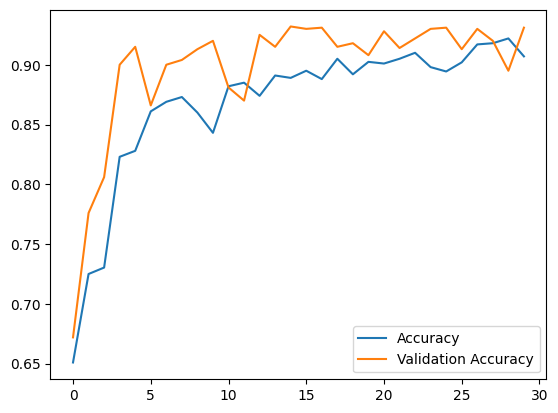

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

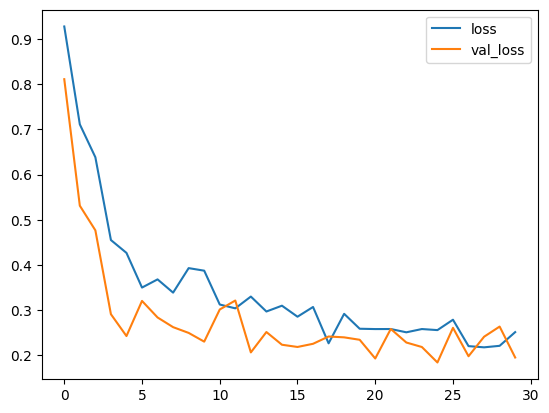

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
def pred(a):
  img_pred = image.load_img(a,target_size=(200,200))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

1/1 [==============================] - 0s 27ms/step
[[1. 0. 0.]]


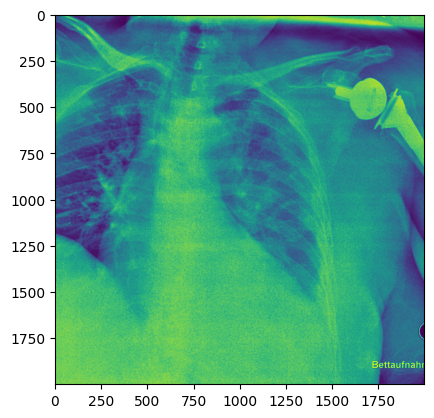

Prediction:  COVID-19


In [ ]:
pred("/content/Data/test/COVID19/COVID19(467).jpg")

# TRANSFER LEARNING

###INCEPTIONRESTNETV2

In [40]:
from keras import optimizers
from keras.applications import InceptionResNetV2
from keras.models import Model
from keras import applications

In [ ]:
inc=InceptionResNetV2(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet",
)

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
len(inc.layers)

780

In [ ]:
inc.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                

In [ ]:
for layer in inc.layers:
  layer.trainable=False

In [ ]:
from keras.layers.pooling.global_max_pooling2d import GlobalMaxPooling2D
x=MaxPooling2D(pool_size=(2,2))(inc.output)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(64,activation='relu')(x)
x=Dense(3,activation='softmax')(x)


In [ ]:
model1=Model(inc.input,x)

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_1=model1.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,validation_data=test_generator,validation_steps=nb_validation_samples)

<ipython-input-40-5ec719c633ee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_1=model1.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,validation_data=test_generator,validation_steps=nb_validation_samples)


Epoch 1/30
100/100 [==============================] - 63s 472ms/step - loss: 1.1233 - accuracy: 0.7080 - val_loss: 0.2194 - val_accuracy: 0.9180
Epoch 2/30
100/100 [==============================] - 43s 431ms/step - loss: 0.4221 - accuracy: 0.8490 - val_loss: 0.2906 - val_accuracy: 0.8960
Epoch 3/30
100/100 [==============================] - 43s 432ms/step - loss: 0.3530 - accuracy: 0.8642 - val_loss: 0.2335 - val_accuracy: 0.9100
Epoch 4/30
100/100 [==============================] - 45s 452ms/step - loss: 0.3054 - accuracy: 0.8880 - val_loss: 0.2080 - val_accuracy: 0.9170
Epoch 5/30
100/100 [==============================] - 43s 429ms/step - loss: 0.2904 - accuracy: 0.8910 - val_loss: 0.1970 - val_accuracy: 0.9220
Epoch 6/30
100/100 [==============================] - 44s 437ms/step - loss: 0.3569 - accuracy: 0.8770 - val_loss: 0.3567 - val_accuracy: 0.8570
Epoch 7/30
100/100 [==============================] - 36s 360ms/step - loss: 0.2842 - accuracy: 0.8930 - val_loss: 0.2284 - val_ac

In [ ]:
def prediction(a):
  img_pred = image.load_img(a,target_size=(200,200))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model1.predict(img_pred)
  print(result)

  max=np.argmax(result)
  if max==0:
    print("Covid")
  elif max==1:
    print("Normal")
  else:
    print("Pneumonia")


  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

1/1 [==============================] - 0s 38ms/step
[[1. 0. 0.]]
Covid


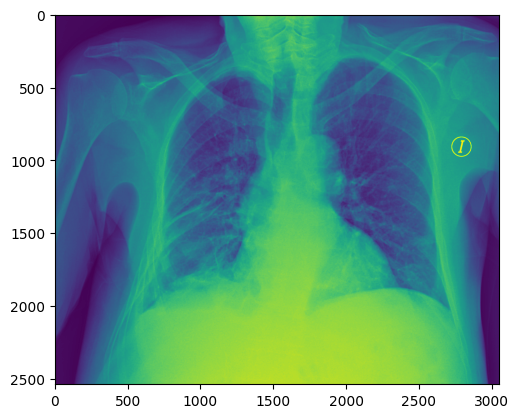

In [ ]:
prediction("/content/Data/test/COVID19/COVID19(491).jpg")

# GRADIO

In [38]:
!pip install gradio


In [19]:
import gradio as gr

### INCEPTIONRESTNETV2

In [41]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [42]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

219055592/219055592 [==============================] - 1s 0us/step


In [43]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)


In [44]:
def predict_covid19(xray_image):
  img = image.array_to_img(xray_image)
  img = img.resize((200, 200))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  prediction = model.predict(img_array)[0][0]
  max=np.argmax(prediction)
  if max==0:
    print("Covid")
  elif max==1:
    print("Normal")
  else:
    print("Pneumonia")




In [45]:
imagein=gr.inputs.Image()
sample=[["/content/Data/test/COVID19/COVID19(460).jpg"],["/content/Data/test/COVID19/COVID19(505).jpg"],["/content/Data/test/NORMAL/NORMAL(1338).jpg"],["/content/Data/test/NORMAL/NORMAL(1416).jpg"],["/content/Data/test/PNEUMONIA/PNEUMONIA(3563).jpg"]]
inface = gr.Interface(
    fn=predict_covid19,
    inputs=imagein,
    outputs="text",
    title="COVID-19 X-ray Detection",
    description="Upload a chest X-ray image to check for COVID-19 infection.",
    examples=sample
)

<ipython-input-45-f259a24f675d>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  imagein=gr.inputs.Image()
<ipython-input-45-f259a24f675d>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  imagein=gr.inputs.Image()


In [46]:
inface.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://87d1b086fab7aabb41.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 5s 5s/step
Covid
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://87d1b086fab7aabb41.gradio.live
